http://www.adeveloperdiary.com/data-science/machine-learning/derivation-and-implementation-of-baum-welch-algorithm-for-hidden-markov-model/

In [3]:
import pickle
import pandas as pd

a_file = open("./src/generated_files/input_hmm.pkl", "rb")
input_hmm = pickle.load(a_file)

unigram = input_hmm.get('unigram')
bi_fut = input_hmm.get('bi_fut')
bi_past = input_hmm.get('bi_past')

df = pd.read_csv('./data_TM2/processed/processed_utterances_sentence_DA_labeling.csv', index_col=0)

In [ ]:
# import pandas as pd
# import numpy as np
 
# def forward(V, a, b, initial_distribution):
#     alpha = np.zeros((V.shape[0], a.shape[0]))
#     alpha[0, :] = initial_distribution * b[:, V[0]]
 
#     for t in range(1, V.shape[0]):
#         for j in range(a.shape[0]):
#             # Matrix Computation Steps
#             #                  ((1x2) . (1x2))      *     (1)
#             #                        (1)            *     (1)
#             alpha[t, j] = alpha[t - 1].dot(a[:, j]) * b[j, V[t]]
 
#     return alpha
 
# def backward(V, a, b):
#     beta = np.zeros((V.shape[0], a.shape[0]))
 
#     # setting beta(T) = 1
#     beta[V.shape[0] - 1] = np.ones((a.shape[0]))
 
#     # Loop in backward way from T-1 to
#     # Due to python indexing the actual loop will be T-2 to 0
#     for t in range(V.shape[0] - 2, -1, -1):
#         for j in range(a.shape[0]):
#             beta[t, j] = (beta[t + 1] * b[:, V[t + 1]]).dot(a[j, :])
 
#     return beta
 
# def baum_welch(V, a, b, initial_distribution, n_iter=100):
#     M = a.shape[0]
#     T = len(V)
 
#     for n in range(n_iter):
#         alpha = forward(V, a, b, initial_distribution)
#         beta = backward(V, a, b)
 
#         xi = np.zeros((M, M, T - 1))
#         for t in range(T - 1):
#             denominator = np.dot(np.dot(alpha[t, :].T, a) * b[:, V[t + 1]].T, beta[t + 1, :])
#             for i in range(M):
#                 numerator = alpha[t, i] * a[i, :] * b[:, V[t + 1]].T * beta[t + 1, :].T
#                 xi[i, :, t] = numerator / denominator
 
#         gamma = np.sum(xi, axis=1)
#         a = np.sum(xi, 2) / np.sum(gamma, axis=1).reshape((-1, 1))
 
#         # Add additional T'th element in gamma
#         gamma = np.hstack((gamma, np.sum(xi[:, :, T - 2], axis=0).reshape((-1, 1))))
 
#         K = b.shape[1]
#         denominator = np.sum(gamma, axis=1)
#         for l in range(K):
#             b[:, l] = np.sum(gamma[:, V == l], axis=1)
 
#         b = np.divide(b, denominator.reshape((-1, 1)))
 
#     return {"a":a, "b":b}
 
# data = pd.read_csv('data_python.csv')
 
# V = data['Visible'].values
 
# # Transition Probabilities
# a = np.ones((2, 2))
# a = a / np.sum(a, axis=1)
 
# # Emission Probabilities
# b = np.array(((1, 3, 5), (2, 4, 6)))
# b = b / np.sum(b, axis=1).reshape((-1, 1))
 
# # Equal Probabilities for the initial distribution
# initial_distribution = np.array((0.5, 0.5))
 
# print(baum_welch(V, a, b, initial_distribution, n_iter=100))

applied to my case

In [ ]:
import pandas as pd
import numpy as np
 
def forward(V, a, b, initial_distribution):
    alpha = np.zeros((len(V), a.shape[0]))
    alpha[0, :] = initial_distribution * b[:, len(V)]
 
    for t in range(1, V.shape[0]):
        for j in range(a.shape[0]):
            # Matrix Computation Steps
            #                  ((1x2) . (1x2))      *     (1)
            #                        (1)            *     (1)
            alpha[t, j] = alpha[t - 1].dot(a[:, j]) * b[j, V[t]]
 
    return alpha
 
def backward(V, a, b):
    beta = np.zeros((len(V), a.shape[0]))
 
    # setting beta(T) = 1
    beta[len(V) - 1] = np.ones((a.shape[0]))
 
    # Loop in backward way from T-1 to
    # Due to python indexing the actual loop will be T-2 to 0
    for t in range(len(V) - 2, -1, -1):
        for j in range(a.shape[0]):
            beta[t, j] = (beta[t + 1] * b[:, V[t + 1]]).dot(a[j, :])
 
    return beta
 
def baum_welch(V, a, b, initial_distribution, n_iter=100):
    M = a.shape[0]
    T = len(V)
 
    for n in range(n_iter):
        alpha = forward(V, a, b, initial_distribution)
        beta = backward(V, a, b)
 
        xi = np.zeros((M, M, T - 1))
        for t in range(T - 1):
            denominator = np.dot(np.dot(alpha[t, :].T, a) * b[:, V[t + 1]].T, beta[t + 1, :])
            for i in range(M):
                numerator = alpha[t, i] * a[i, :] * b[:, V[t + 1]].T * beta[t + 1, :].T
                xi[i, :, t] = numerator / denominator
 
        gamma = np.sum(xi, axis=1)
        a = np.sum(xi, 2) / np.sum(gamma, axis=1).reshape((-1, 1))
 
        # Add additional T'th element in gamma
        gamma = np.hstack((gamma, np.sum(xi[:, :, T - 2], axis=0).reshape((-1, 1))))
 
        K = b.shape[1]
        denominator = np.sum(gamma, axis=1)
        for l in range(K):
            b[:, l] = np.sum(gamma[:, V == l], axis=1)
 
        b = np.divide(b, denominator.reshape((-1, 1)))
 
    return {"a":a, "b":b}
 
data = pd.read_csv('data_python.csv')
 
V = data['Visible'].values #observations
print(V)
print(V.shape[0])
V = unigram
print(V)
print(V.shape[0])

# Transition Probabilities
# a = np.ones((2, 2))
a = np.array(([0.1, 0.9], [0.6,0.4]))
print(a)
# a = a / np.sum(a, axis=1)
# print(a)
 
# Emission Probabilities
b = np.array(((1, 3, 5), (2, 4, 6)))
b= np.array((bi_past.values(), bi_fut.values()))
# print(b)
# b = b / np.sum(b, axis=1).reshape((-1, 1))
# print(b)

 
# Equal Probabilities for the initial distribution
initial_distribution = np.array((0.9999, 0.0001))
 
print(baum_welch(V, a, b, initial_distribution, n_iter=100))

## Sensitivity

In [4]:
c_file = open("./src/generated_files/dict_sensitivity_change_prob_matrix_HMM.pkl", "rb")
sensitivity = pickle.load(c_file)

In [5]:
print(sensitivity['mean_n_patterns_per_dialog'])
print(sensitivity['mean_len_patterns'])
print(sensitivity['norm_mean_n_patterns_per_dialog'])

[16.600821378991206, 16.520418787598334, 16.483283202221195, 16.441577973160573, 16.392526608051828, 16.331848681166125, 16.249074502545117, 16.103597871355852, 15.798241554835725, 14.978713558537715, 11.816404442387784, 2.859787135585377, 1.046737621471541, 1.0, 1.0, 1.0, 1.0, 1.0]
[2.000244710000111, 2.0105621335957093, 2.0156122163070886, 2.0214793559939164, 2.0285863528067765, 2.0376485057930935, 2.0505033646150226, 2.0733672652626662, 2.1207902060727353, 2.2491930945444913, 2.8558082077499813, 10.491166956954466, 29.263613861386137, nan, nan, nan, nan, nan]
[0.4882594523232708, 0.48589467022348043, 0.48480244712415277, 0.48357582274001687, 0.4821331355309361, 0.4803484906225331, 0.4779139559572093, 0.4736352315104662, 0.4646541633775213, 0.44055039878052105, 0.34754130712905246, 0.08411138634074639, 0.03078640063151591, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353]


In [6]:
sensitivity.keys()

dict_keys(['0.1', 'mean_n_patterns_per_dialog', 'norm_mean_n_patterns_per_dialog', 'max_n_patters', 'min_n_patters', 'var_n_patters', 'mean_len_patterns', 'norm_mean_len_patterns', '0.15', '0.2', '0.25', '0.3', '0.35', '0.4', '0.45', '0.5', '0.55', '0.6', '0.65', '0.7', '0.75', '0.8', '0.85', '0.9', '0.95'])

In [7]:
len(sensitivity.get('0.2'))

17288

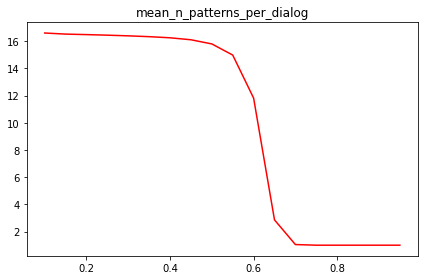

In [8]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.autolayout"] = True

plt.title("mean_n_patterns_per_dialog")
plt.plot(np.arange(0.1, 1.0, 0.05), sensitivity.get('mean_n_patterns_per_dialog'), color="red")
plt.savefig('./src/generated_files/sensit_mean_n_patterns_per_dialog.png')
plt.show()

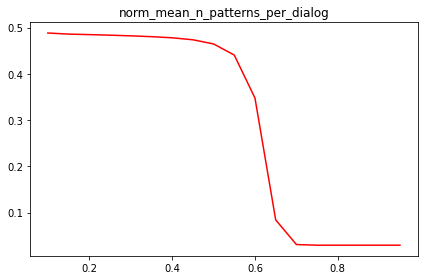

In [9]:
plt.rcParams["figure.autolayout"] = True

plt.title("norm_mean_n_patterns_per_dialog")
plt.plot(np.arange(0.1, 1.0, 0.05), sensitivity.get('norm_mean_n_patterns_per_dialog'), color="red")
plt.savefig('./src/generated_files/sensit_norm_mean_n_patterns_per_dialog.png')
plt.show()

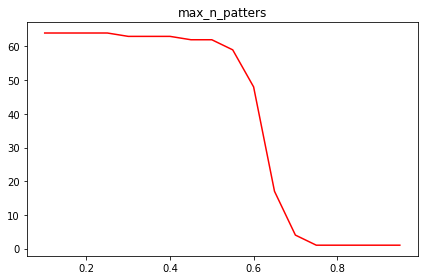

In [10]:
plt.rcParams["figure.autolayout"] = True

plt.title("max_n_patters")
plt.plot(np.arange(0.1, 1.0, 0.05), sensitivity.get('max_n_patters'), color="red")
plt.savefig('./src/generated_files/sensit_max_n_patters.png')
plt.show()

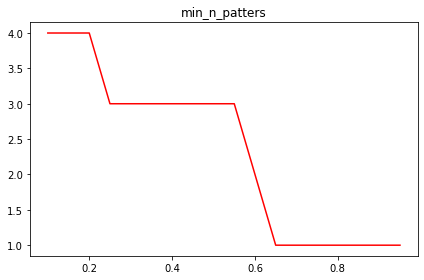

In [11]:
plt.rcParams["figure.autolayout"] = True

plt.title("min_n_patters")
plt.plot(np.arange(0.1, 1.0, 0.05), sensitivity.get('min_n_patters'), color="red")
plt.savefig('./src/generated_files/sensit_min_n_patters.png')
plt.show()

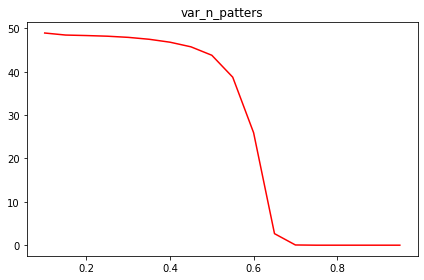

In [12]:
plt.rcParams["figure.autolayout"] = True

plt.title("var_n_patters")
plt.plot(np.arange(0.1, 1.0, 0.05), sensitivity.get('var_n_patters'), color="red")
plt.savefig('./src/generated_files/sensit_var_n_patters.png')
plt.show()

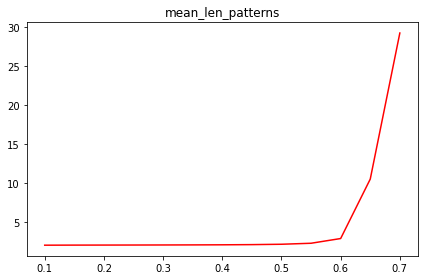

In [13]:
plt.rcParams["figure.autolayout"] = True

plt.title("mean_len_patterns")
plt.plot(np.arange(0.1, 1.0, 0.05), sensitivity.get('mean_len_patterns'), color="red")
plt.savefig('./src/generated_files/sensit_mean_len_patterns.png')
plt.show()


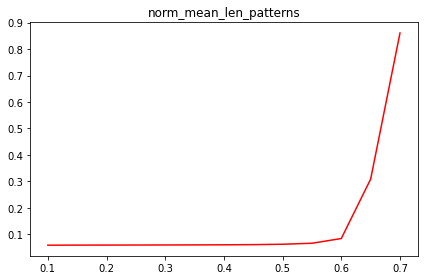

In [14]:
plt.rcParams["figure.autolayout"] = True

plt.title("norm_mean_len_patterns")
plt.plot(np.arange(0.1, 1.0, 0.05), sensitivity.get('norm_mean_len_patterns'), color="red")
plt.savefig('./src/generated_files/sensit_norm_mean_len_patterns.png')
plt.show()


## Most frequent starterd and enders of patterns

In [15]:
b_file = open("./src/generated_files/sorted_dict_HMM.pkl", "rb")
hmm = pickle.load(b_file)
hmm = dict( [(k,v) for k,v in hmm.items() if len(k)>0])

In [16]:
starters = []
enders = []

for key in hmm.keys():
    k = key.split()
    starters.append(k[0])
    enders.append(k[len(k)-1])

In [17]:
import collections

count_st=collections.Counter(starters)
count_end=collections.Counter(enders)
print(count_st)
print(count_end)

Counter({'<UNK>': 3879, 'U_answer': 3784, 'U_confirmation': 3307, 'U_greeting': 2416, 'U_partial_request': 2412, 'A_grant': 2378, 'A_greeting': 2181, 'A_confirmation': 1724, 'A_detail_request': 1169, 'U_sequence_closer': 755, 'A_hold_request': 291, 'A_sequence_closer': 238, 'A_completion_check': 221, 'A_receipt': 105, 'A_repair_initiator': 72, 'A_disconfirmation': 66, 'U_disconfirmation': 56, 'U_repair_initiator': 35, 'U_completion_check': 21, 'U_receipt': 20, 'U_hold_request': 10})
Counter({'<UNK>': 5502, 'A_detail_request': 4703, 'U_partial_request': 4118, 'U_sequence_closer': 2273, 'U_greeting': 2017, 'A_greeting': 1790, 'A_sequence_closer': 1551, 'U_confirmation': 1191, 'A_confirmation': 1180, 'U_answer': 361, 'A_grant': 329, 'A_receipt': 110, 'U_receipt': 9, 'A_hold_request': 2, 'A_disconfirmation': 1, 'A_repair_initiator': 1, 'A_completion_check': 1, 'U_disconfirmation': 1})


In [19]:
count_end

Counter({'A_detail_request': 4703,
         'U_partial_request': 4118,
         'U_sequence_closer': 2273,
         'A_sequence_closer': 1551,
         '<UNK>': 5502,
         'A_greeting': 1790,
         'A_grant': 329,
         'U_answer': 361,
         'A_receipt': 110,
         'A_confirmation': 1180,
         'U_greeting': 2017,
         'U_confirmation': 1191,
         'U_receipt': 9,
         'A_disconfirmation': 1,
         'A_repair_initiator': 1,
         'A_completion_check': 1,
         'U_disconfirmation': 1,
         'A_hold_request': 2})